# Cost Function and Gradients in Linear Regression

## Cost Function

In linear regression, the cost function (also known as the loss function) measures how well the model's predictions match the actual data. The Mean Squared Error (MSE) is commonly used as the cost function:

**Predicted Value**:
- $\hat{y} = wx + b$

**Cost Function (MSE)**:
- $J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^2$

Where:
- $J(w, b)$ is the cost function.
- $n$ is the number of training examples.
- $\hat{y}^{(i)}$ is the predicted value for the $i^{th}$ training example.
- $y^{(i)}$ is the actual value for the $i^{th}$ training example.
- $w$ is the weight vector.
- $b$ is the bias term.

## Gradients

To minimize the cost function using gradient descent, we need to compute the gradients of the cost function with respect to the model parameters ($w$ and $b$). The gradients are given by:

**Gradient of Cost Function with respect to w**:
- $\frac{\partial J(w, b)}{\partial w} = \frac{-2}{n} \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)}) x^{(i)}$

**Gradient of Cost Function with respect to b**:
- $\frac{\partial J(w, b)}{\partial b} = \frac{-2}{n} \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})$

### Gradient Descent Update Rule

The weights are updated using the gradient descent rule:

**Weight Update Rule**:
- $w := w - \alpha \cdot \frac{\partial J(w, b)}{\partial w}$
- $b := b - \alpha \cdot \frac{\partial J(w, b)}{\partial b}$

Where:
- $\alpha$ is the learning rate.
- The update rules are applied for each parameter $w$ and $b$.

## Summary

- The predicted value $\hat{y}$ is calculated using the formula $y_{\text{hat}} = wx + b$.
- The cost function (MSE) quantifies how well the model fits the data.
- The gradients provide the necessary direction and magnitude for updating the model parameters during optimization.


In [74]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

class LinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000, loss_type='mse', print_every=100):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
        self.history = []  # List to store the loss at each iteration
        self.loss_type = loss_type
        self.print_every = print_every

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for i in range(self.iterations):
            y_predicted = np.dot(X, self.weights) + self.bias

            # Calculate the gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)

            # Update the weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            
            # Calculate and store the loss for this iteration
            if self.loss_type == 'mse':
                loss = self.mean_squared_error(y, y_predicted)
            elif self.loss_type == 'rmse':
                loss = self.root_mean_squared_error(y, y_predicted)
            else:
                raise ValueError("Invalid loss type. Choose 'mse' or 'rmse'.")

            self.history.append(loss)  # Store the loss in the history

            # Print loss every 'print_every' iterations
            if (i+1) % self.print_every == 0:
                print(f"Iteration {i+1}/{self.iterations}, Loss: {loss:.4f}")

    def predict(self, X):
        y_predicted = np.dot(X, self.weights) + self.bias
        return y_predicted

    # Method to compute Mean Squared Error (MSE)
    def mean_squared_error(self, y_true, y_predicted):
        return np.mean((y_true - y_predicted) ** 2)
    
    # Method to compute Root Mean Squared Error (RMSE)
    def root_mean_squared_error(self, y_true, y_predicted):
        return np.sqrt(self.mean_squared_error(y_true, y_predicted))

In [92]:
# Custom StandardScaler class
class StandardScaler:
    def __init__(self):
        self.mean = None
        self.std = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

    def transform(self, X):
        return (X - self.mean) / self.std

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
    
    def inverse_transform(self, X_standardized):
        return X_standardized * self.std + self.mean
    
# Custom MinMaxScaler class
class MinMaxScaler:
    def __init__(self, feature_range=(0, 1)):
        self.min = None
        self.max = None
        self.range = feature_range

    def fit(self, X):
        self.min = np.min(X, axis=0)
        self.max = np.max(X, axis=0)

    def transform(self, X):
        return (X - self.min) / (self.max - self.min) * (self.range[1] - self.range[0]) + self.range[0]

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
    
    def inverse_transform(self, X_scaled):
        return (X_scaled - self.range[0]) / (self.range[1] - self.range[0]) * (self.max - self.min) + self.min

In [76]:
# Load the dataset
data = fetch_california_housing()

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseValue'] = data.target

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [77]:
# Split the data into training and testing sets

train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]

X_train = train_df.drop('MedHouseValue', axis=1)
y_train = train_df['MedHouseValue']
X_test = test_df.drop('MedHouseValue', axis=1)
y_test = test_df['MedHouseValue']

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (16512, 8)
Testing set shape: (4128, 8)


In [157]:
# Standardize the features
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

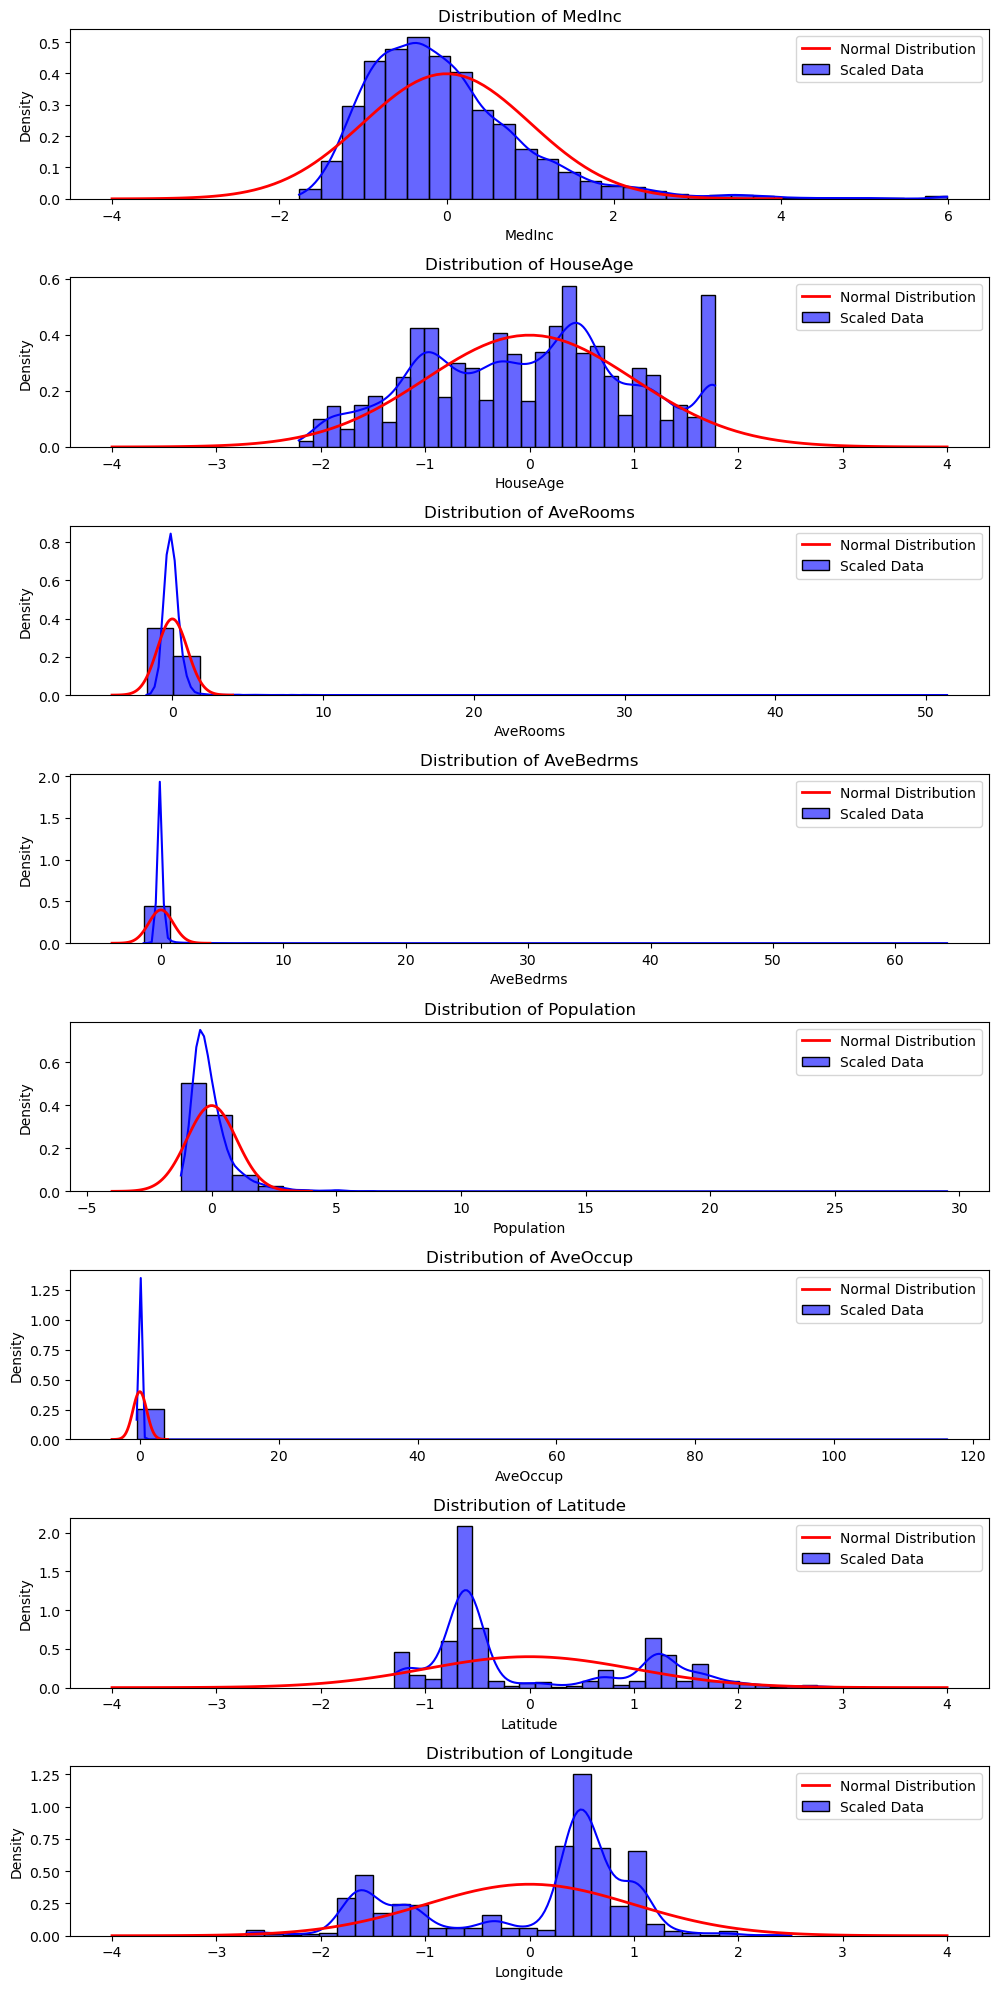

In [158]:
# Set the figure size
plt.figure(figsize=(10, 20))  # Adjust the width and height as needed

# Loop through each feature
for i, column in enumerate(X_train_standardized.columns):
    plt.subplot(len(X_train_standardized.columns), 1, i + 1)
    
    # Plot the distribution of the feature
    sns.histplot(X_train_standardized[column], bins=30, kde=True, color='blue', stat='density', label='Scaled Data', alpha=0.6)
    
    # Calculate mean and standard deviation
    mean = X_train_standardized[column].mean()
    std_dev = X_train_standardized[column].std()
    
    # Generate values for the normal distribution curve
    x = np.linspace(mean - 4*std_dev, mean + 4*std_dev, 100)
    normal_dist = (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)
    
    # Plot the normal distribution
    plt.plot(x, normal_dist, color='red', linewidth=2, label='Normal Distribution')
    
    # Title and labels
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.legend()

# Adjust layout and show the plot
plt.tight_layout()  # This will improve the spacing between subplots
plt.show()

In [79]:
# Initialize and train the Linear Regression model
model_mse = LinearRegression(learning_rate=0.01, iterations=10000, loss_type = 'mse')
model_mse.fit(X_train_standardized, y_train.values)

# Make predictions on the standardized test data
predictions_standardized = model_mse.predict(X_test_standardized)

# Evaluate the model
mse = model_mse.mean_squared_error(y_test.values, predictions_standardized)
print(f"Mean Squared Error on standardized test data: {mse}")

Iteration 100/10000, Loss: 1.2848
Iteration 200/10000, Loss: 0.7136
Iteration 300/10000, Loss: 0.6259
Iteration 400/10000, Loss: 0.6054
Iteration 500/10000, Loss: 0.5953
Iteration 600/10000, Loss: 0.5876
Iteration 700/10000, Loss: 0.5811
Iteration 800/10000, Loss: 0.5754
Iteration 900/10000, Loss: 0.5705
Iteration 1000/10000, Loss: 0.5661
Iteration 1100/10000, Loss: 0.5624
Iteration 1200/10000, Loss: 0.5591
Iteration 1300/10000, Loss: 0.5562
Iteration 1400/10000, Loss: 0.5537
Iteration 1500/10000, Loss: 0.5515
Iteration 1600/10000, Loss: 0.5496
Iteration 1700/10000, Loss: 0.5479
Iteration 1800/10000, Loss: 0.5464
Iteration 1900/10000, Loss: 0.5451
Iteration 2000/10000, Loss: 0.5440
Iteration 2100/10000, Loss: 0.5430
Iteration 2200/10000, Loss: 0.5421
Iteration 2300/10000, Loss: 0.5414
Iteration 2400/10000, Loss: 0.5407
Iteration 2500/10000, Loss: 0.5401
Iteration 2600/10000, Loss: 0.5396
Iteration 2700/10000, Loss: 0.5391
Iteration 2800/10000, Loss: 0.5387
Iteration 2900/10000, Loss: 0

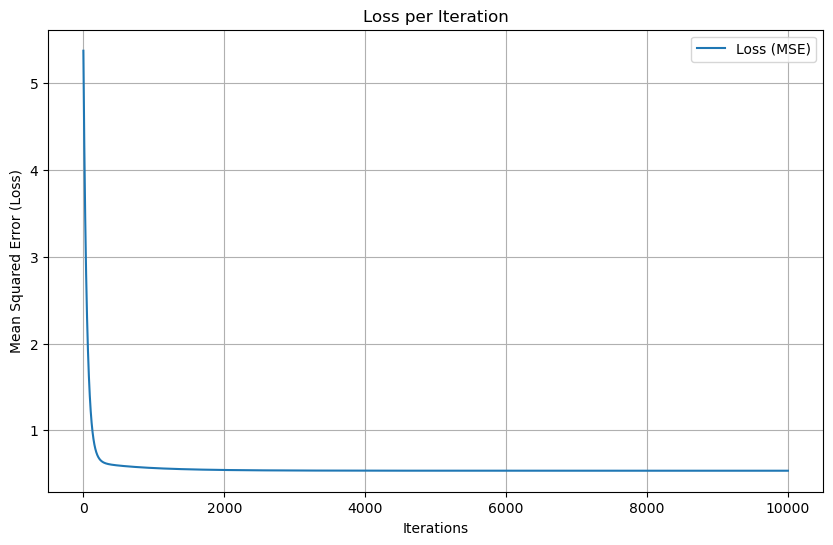

In [80]:
# Plot Loss per Iteration

plt.figure(figsize=(10,6))
plt.plot(range(model_mse.iterations), model_mse.history, label='Loss (MSE)')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error (Loss)')
plt.title('Loss per Iteration')
plt.legend()
plt.grid(True)
plt.show()

In [81]:
# Initialize and train the Linear Regression model
model_rmse = LinearRegression(learning_rate=0.01, iterations=10000, loss_type = 'rmse')
model_rmse.fit(X_train_standardized, y_train.values)

# Make predictions on the standardized test data
predictions_standardized = model_rmse.predict(X_test_standardized)

# Evaluate the model
rmse = model_rmse.mean_squared_error(y_test.values, predictions_standardized)
print(f"Root Mean Squared Error on standardized test data: {rmse}")

Iteration 100/10000, Loss: 1.1335
Iteration 200/10000, Loss: 0.8447
Iteration 300/10000, Loss: 0.7912
Iteration 400/10000, Loss: 0.7781
Iteration 500/10000, Loss: 0.7716
Iteration 600/10000, Loss: 0.7666
Iteration 700/10000, Loss: 0.7623
Iteration 800/10000, Loss: 0.7586
Iteration 900/10000, Loss: 0.7553
Iteration 1000/10000, Loss: 0.7524
Iteration 1100/10000, Loss: 0.7499
Iteration 1200/10000, Loss: 0.7477
Iteration 1300/10000, Loss: 0.7458
Iteration 1400/10000, Loss: 0.7441
Iteration 1500/10000, Loss: 0.7426
Iteration 1600/10000, Loss: 0.7413
Iteration 1700/10000, Loss: 0.7402
Iteration 1800/10000, Loss: 0.7392
Iteration 1900/10000, Loss: 0.7383
Iteration 2000/10000, Loss: 0.7376
Iteration 2100/10000, Loss: 0.7369
Iteration 2200/10000, Loss: 0.7363
Iteration 2300/10000, Loss: 0.7358
Iteration 2400/10000, Loss: 0.7353
Iteration 2500/10000, Loss: 0.7349
Iteration 2600/10000, Loss: 0.7346
Iteration 2700/10000, Loss: 0.7343
Iteration 2800/10000, Loss: 0.7340
Iteration 2900/10000, Loss: 0

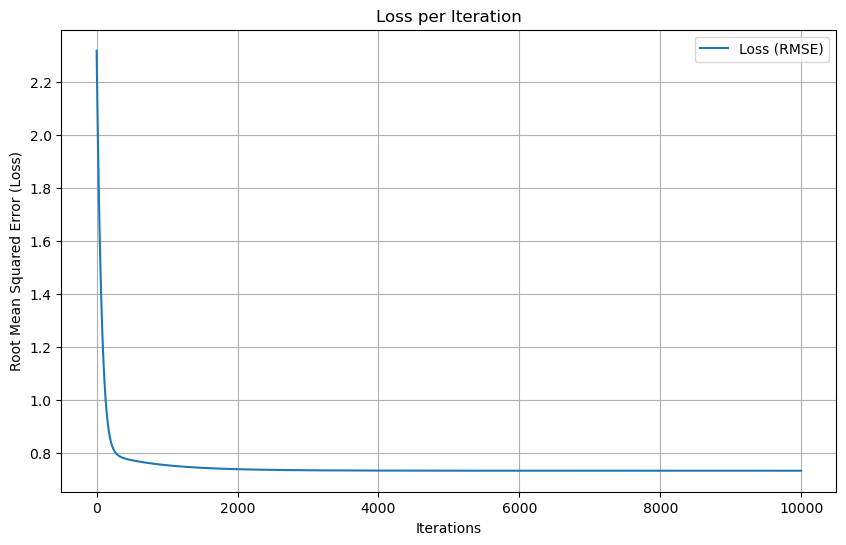

In [82]:
# Plot Loss per Iteration

plt.figure(figsize=(10,6))
plt.plot(range(model_rmse.iterations), model_rmse.history, label='Loss (RMSE)')
plt.xlabel('Iterations')
plt.ylabel('Root Mean Squared Error (Loss)')
plt.title('Loss per Iteration')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [88]:
# Print min, max, and basic statistics
y = data.target
y_dollars = np.round(y * 100000, 2)

# Calculate and print statistics
print(f"Minimum median house value: ${np.min(y_dollars):,.2f}")
print(f"Maximum median house value: ${np.max(y_dollars):,.2f}")
print(f"Mean median house value: ${np.mean(y_dollars):,.2f}")
print(f"Median median house value: ${np.median(y_dollars):,.2f}")

Minimum median house value: $14,999.00
Maximum median house value: $500,001.00
Mean median house value: $206,855.82
Median median house value: $179,700.00


In [85]:
sample_data = pd.DataFrame({
    'MedInc': [3.5],
    'HouseAge': [20],
    'AveRooms': [np.nan],  # Missing value
    'AveBedrms': [np.nan],  # Missing value
    'Population': [1500],
    'AveOccup': [3],
    'Latitude': [34.0],
    'Longitude': [-118.0]
})

mean_values = df.mean()

imputed_data = sample_data.fillna(mean_values, inplace=False)

imputed_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,3.5,20,5.429,1.096675,1500,3,34.0,-118.0


In [89]:
scaled_samples = scaler.transform(imputed_data)
scaled_samples

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.160534,-0.725417,0.012982,-0.009714,0.053751,-0.00154,-0.601108,0.588303


In [90]:
predicted_mse = model_mse.predict(scaled_samples)
predicted_rmse = model_rmse.predict(scaled_samples)
predicted_mse_dollars = np.round(predicted_mse[0] * 100000, 2)
predicted_rmse_dollars = np.round(predicted_rmse[0] * 100000, 2)

# Print the predictions
print(f"Predicted house value using MSE model: ${predicted_mse_dollars:,.2f}")
print(f"Predicted house value using RMSE model: ${predicted_rmse_dollars:,.2f}")

Predicted house value using MSE model: $183,271.61
Predicted house value using RMSE model: $183,271.61


In [93]:
# Standardize the features
min_max = MinMaxScaler()
X_train_minmaxed = min_max.fit_transform(X_train.values)
X_test_minmaxed = min_max.transform(X_test.values)

Iteration 100/10000, Loss: 1.3516
Iteration 200/10000, Loss: 1.2039
Iteration 300/10000, Loss: 1.1807
Iteration 400/10000, Loss: 1.1620
Iteration 500/10000, Loss: 1.1442
Iteration 600/10000, Loss: 1.1270
Iteration 700/10000, Loss: 1.1105
Iteration 800/10000, Loss: 1.0946
Iteration 900/10000, Loss: 1.0793
Iteration 1000/10000, Loss: 1.0645
Iteration 1100/10000, Loss: 1.0502
Iteration 1200/10000, Loss: 1.0365
Iteration 1300/10000, Loss: 1.0231
Iteration 1400/10000, Loss: 1.0103
Iteration 1500/10000, Loss: 0.9978
Iteration 1600/10000, Loss: 0.9858
Iteration 1700/10000, Loss: 0.9742
Iteration 1800/10000, Loss: 0.9629
Iteration 1900/10000, Loss: 0.9520
Iteration 2000/10000, Loss: 0.9414
Iteration 2100/10000, Loss: 0.9312
Iteration 2200/10000, Loss: 0.9213
Iteration 2300/10000, Loss: 0.9117
Iteration 2400/10000, Loss: 0.9024
Iteration 2500/10000, Loss: 0.8935
Iteration 2600/10000, Loss: 0.8847
Iteration 2700/10000, Loss: 0.8763
Iteration 2800/10000, Loss: 0.8681
Iteration 2900/10000, Loss: 0

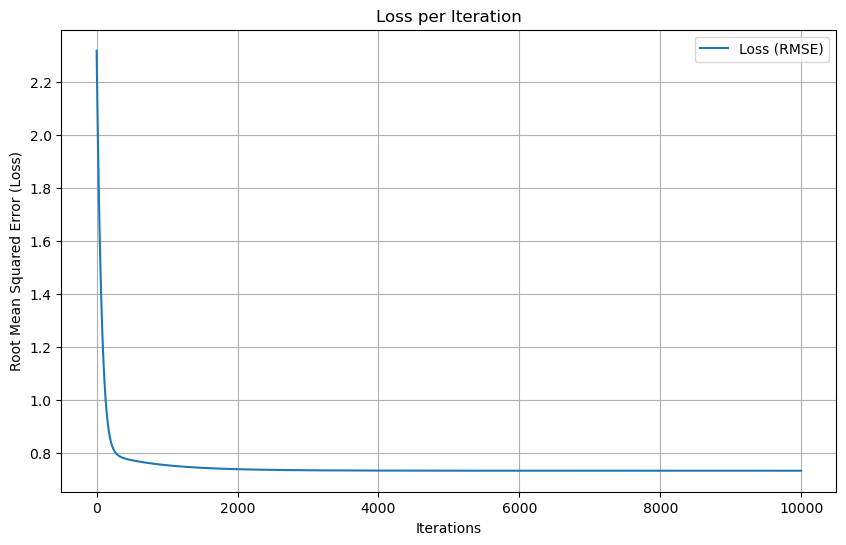

In [94]:
# Initialize and train the Linear Regression model
model_mse = LinearRegression(learning_rate=0.01, iterations=10000, loss_type = 'mse')
model_mse.fit(X_train_minmaxed, y_train.values)

# Make predictions on the standardized test data
predictions_minmaxed = model_mse.predict(X_test_minmaxed)

# Evaluate the model
mse = model_mse.mean_squared_error(y_test.values, predictions_minmaxed)
print(f"Mean Squared Error on standardized test data: {mse}")

# Plot Loss per Iteration

plt.figure(figsize=(10,6))
plt.plot(range(model_rmse.iterations), model_rmse.history, label='Loss (RMSE)')
plt.xlabel('Iterations')
plt.ylabel('Root Mean Squared Error (Loss)')
plt.title('Loss per Iteration')
plt.legend()
plt.grid(True)
plt.show()

Iteration 100/10000, Loss: 1.1626
Iteration 200/10000, Loss: 1.0972
Iteration 300/10000, Loss: 1.0866
Iteration 400/10000, Loss: 1.0780
Iteration 500/10000, Loss: 1.0697
Iteration 600/10000, Loss: 1.0616
Iteration 700/10000, Loss: 1.0538
Iteration 800/10000, Loss: 1.0462
Iteration 900/10000, Loss: 1.0389
Iteration 1000/10000, Loss: 1.0318
Iteration 1100/10000, Loss: 1.0248
Iteration 1200/10000, Loss: 1.0181
Iteration 1300/10000, Loss: 1.0115
Iteration 1400/10000, Loss: 1.0051
Iteration 1500/10000, Loss: 0.9989
Iteration 1600/10000, Loss: 0.9929
Iteration 1700/10000, Loss: 0.9870
Iteration 1800/10000, Loss: 0.9813
Iteration 1900/10000, Loss: 0.9757
Iteration 2000/10000, Loss: 0.9703
Iteration 2100/10000, Loss: 0.9650
Iteration 2200/10000, Loss: 0.9598
Iteration 2300/10000, Loss: 0.9548
Iteration 2400/10000, Loss: 0.9500
Iteration 2500/10000, Loss: 0.9452
Iteration 2600/10000, Loss: 0.9406
Iteration 2700/10000, Loss: 0.9361
Iteration 2800/10000, Loss: 0.9317
Iteration 2900/10000, Loss: 0

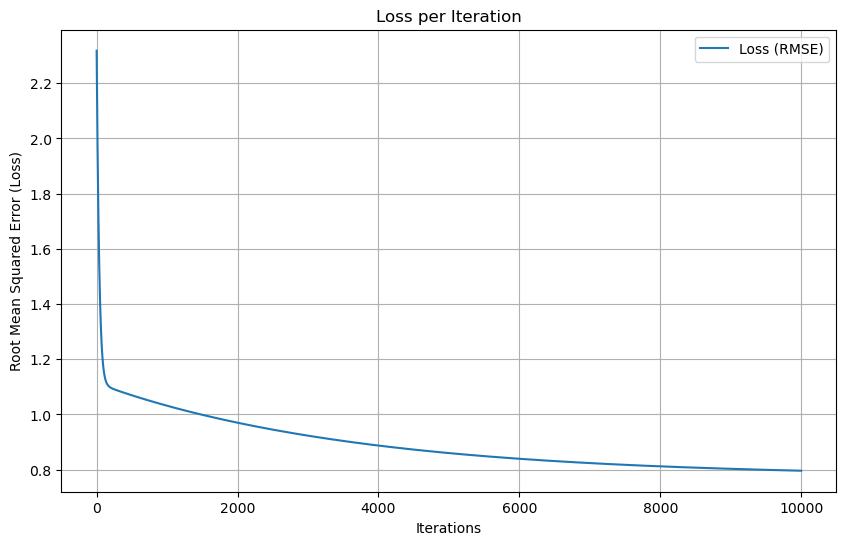

In [95]:
# Initialize and train the Linear Regression model
model_rmse = LinearRegression(learning_rate=0.01, iterations=10000, loss_type = 'rmse')
model_rmse.fit(X_train_minmaxed, y_train.values)

# Make predictions on the standardized test data
predictions_minmaxed = model_rmse.predict(X_test_minmaxed)

# Evaluate the model
rmse = model_rmse.mean_squared_error(y_test.values, predictions_minmaxed)
print(f"Root Mean Squared Error on standardized test data: {rmse}")

# Plot Loss per Iteration

plt.figure(figsize=(10,6))
plt.plot(range(model_rmse.iterations), model_rmse.history, label='Loss (RMSE)')
plt.xlabel('Iterations')
plt.ylabel('Root Mean Squared Error (Loss)')
plt.title('Loss per Iteration')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
minmaxed_samples = min_max.transform(imputed_data)
minmaxed_samples

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,0.206901,0.372549,0.032488,0.02142,0.041957,0.003852,0.155154,0.63247


In [97]:
predicted_mse = model_mse.predict(minmaxed_samples)
predicted_rmse = model_rmse.predict(minmaxed_samples)
predicted_mse_dollars = np.round(predicted_mse[0] * 100000, 2)
predicted_rmse_dollars = np.round(predicted_rmse[0] * 100000, 2)

# Print the predictions
print(f"Predicted house value using MSE model: ${predicted_mse_dollars:,.2f}")
print(f"Predicted house value using RMSE model: ${predicted_rmse_dollars:,.2f}")

Predicted house value using MSE model: $182,769.17
Predicted house value using RMSE model: $182,769.17


# Ordinary Least Squares (OLS) in Linear Regression

## Introduction

Ordinary Least Squares (OLS) is a method used in linear regression to estimate the parameters (weights) of a linear model. The main objective of OLS is to find the best-fitting line (or hyperplane) that minimizes the difference between the predicted values and the actual data points.

## Cost Function

In OLS, the cost function measures the error of the model's predictions. The most commonly used cost function is the **Mean Squared Error (MSE)**, which quantifies the average squared difference between predicted and actual values.

**Predicted Value**:
- $\hat{y} = wx + b$

**Cost Function (MSE)**:
$
J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^2
$

Where:
- $J(w, b)$ is the cost function.
- $n$ is the number of training examples.
- $\hat{y}^{(i)}$ is the predicted value for the $i^{th}$ training example.
- $y^{(i)}$ is the actual value for the $i^{th}$ training example.
- $w$ is the weight vector (coefficients).
- $b$ is the bias term (intercept).

## Parameter Estimation

To find the optimal parameters $w$ and $b$ that minimize the cost function, we derive the OLS estimates analytically rather than using iterative methods like gradient descent. The estimates are derived using the following formulas:

### Weight (Coefficient) Estimation

The optimal weight vector $w$ can be calculated using the Normal Equation:

$
w = (X^TX)^{-1}X^Ty
$

Where:
- $X$ is the matrix of input features (with a column of ones for the bias term).
- $y$ is the vector of target values.

### Bias (Intercept) Estimation

Once the weights are estimated, the bias $b$ can be calculated as follows:

$
b = \bar{y} - \bar{x}^Tw
$

Where:
- $\bar{y}$ is the mean of the target values.
- $\bar{x}$ is the mean of the input feature values.

## Derivation of Weights

The weights $w$ in OLS regression are derived from the cost function (MSE) as follows:

1. **Define the Model**:
   $ \hat{y} = X w $

2. **Define the Cost Function**:
   $ J(w) = \frac{1}{n} (y - Xw)^T (y - Xw) $

3. **Expand the Cost Function**:
   $ J(w) = \frac{1}{n} \left( y^T y - 2y^T Xw + w^T X^T Xw \right) $

4. **Differentiate the Cost Function**:
   $ \frac{\partial J(w)}{\partial w} = \frac{1}{n} \left( -2X^T y + 2X^T Xw \right) = 0 $

5. **Solve for Weights**:
   Rearranging gives:
   $ X^T Xw = X^T y $
   Multiplying both sides by the inverse of $X^T X$ yields:
   $ w = (X^T X)^{-1} X^T y $

## Summary of OLS Steps

1. **Calculate the Predicted Values**:
   - Use the formula $\hat{y} = wx + b$ to compute predictions based on the input features.

2. **Define the Cost Function**:
   - Use MSE to measure how well the predictions fit the actual data: $J(w, b) = \frac{1}{n} \sum_{i=1}^{n} (y^{(i)} - \hat{y}^{(i)})^2$.

3. **Estimate Parameters**:
   - Compute $w$ using the Normal Equation: $w = (X^TX)^{-1}X^Ty$.
   - Calculate $b$ using the mean values of $y$ and $x$.

4. **Make Predictions**:
   - After estimating the parameters, use the model to make predictions on new data points.

## Key Concepts

- **Linear Model**: The relationship between the dependent variable $y$ and independent variables $X$ is assumed to be linear.
- **Line of Best Fit**: The line (or hyperplane in higher dimensions) that minimizes the sum of squared differences between actual and predicted values.
- **Analytical Solution**: Unlike iterative methods, OLS provides an exact solution using matrix operations, making it computationally efficient for small to medium-sized datasets.

### Advantages of OLS

- Simplicity and interpretability of the model.
- Efficient parameter estimation using closed-form solutions.

### Limitations of OLS

- Sensitive to outliers, which can significantly affect the estimated parameters.
- Assumes linearity between predictors and response, which may not hold in all cases.

By understanding these concepts and steps involved in OLS, you can effectively implement linear regression for predictive modeling tasks.


In [142]:
class OLS:
    def __init__(self):
        self.coefficients = None
        self.bias = None
        self.standard_errors = None
        self.feature_names = None  # Store feature names

    def fit(self, X, y, feature_names=None):
        # Add a column of ones to X for the bias term
        X_b = np.hstack((np.ones((X.shape[0], 1)), X))  # Add bias term
        
        # Calculate the weights using the Normal Equation
        self.coefficients = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
        
        # Separate bias and feature weights
        self.bias = self.coefficients[0]
        self.feature_coefficients = self.coefficients[1:]

        # Store feature names if provided
        if feature_names is not None:
            self.feature_names = feature_names

        # Calculate predictions
        predictions = X_b @ self.coefficients  # Use X_b to calculate predictions
        residuals = y - predictions

        # Calculate the standard error of the estimate
        self.standard_error = np.sqrt(np.sum(residuals**2) / (len(y) - X.shape[1] - 1))

        # Calculate standard errors of coefficients
        # Variance-covariance matrix
        X_b_inv = np.linalg.inv(X_b.T @ X_b)
        self.standard_errors = np.sqrt(np.diagonal(self.standard_error**2 * X_b_inv))

    def predict(self, X):
        # Add a column of ones to X for the bias term
        X_b = np.hstack((np.ones((X.shape[0], 1)), X))
        return X_b @ self.coefficients  # Include bias and coefficients in predictions

    def print_coefficients(self):
        print("Bias (Intercept): {:.4f} ± {:.4f}".format(self.bias, self.standard_errors[0]))
        if self.feature_names is not None:
            for i, coef in enumerate(self.feature_coefficients):
                print(f"Feature '{self.feature_names[i]}': {coef:.4f} ± {self.standard_errors[i + 1]:.4f}")
        else:
            for i, coef in enumerate(self.feature_coefficients):
                print("Feature {}: {:.4f} ± {:.4f}".format(i + 1, coef, self.standard_errors[i + 1]))

# Function to plot features against the target variable with a line of best fit
def plot_features_with_best_fit(model, X, y, feature_names):
    num_features = X.shape[1]
    
    # Create subplots
    fig, axes = plt.subplots(num_features, 1, figsize=(10, 6 * num_features))
    
    for i in range(num_features):
        # Select the current feature
        feature = X[:, i]
        
        # Predict the target using the OLS model for the current feature
        X_feature = feature.reshape(-1, 1)  # Reshape for single feature
        model.fit(X_feature, y, feature_names=[feature_names[i]])  # Fit the model on the single feature
        predictions = model.predict(X_feature)  # Get predictions
        
        # Plotting
        axes[i].scatter(feature, y, color='blue', alpha=0.5, label='Data Points')
        axes[i].plot(feature, predictions, color='red', label='Line of Best Fit', linewidth=2)
        axes[i].set_title(f'Feature: {feature_names[i]} vs. MedHouseValue')
        axes[i].set_xlabel(feature_names[i])
        axes[i].set_ylabel('MedHouseValue')
        axes[i].legend()
        
    plt.tight_layout()
    plt.show()

In [143]:
data = fetch_california_housing()

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseValue'] = data.target

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
train_df = df[:train_size]
test_df = df[train_size:]

X_train = train_df.drop('MedHouseValue', axis=1)
y_train = train_df['MedHouseValue']

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [147]:
# Create and fit the OLS model
model = OLS()
model.fit(X_train, y_train, feature_names=X_train_scaled.columns.tolist())

# Print coefficients with uncertainties
model.print_coefficients()

Bias (Intercept): -36.3905 ± 0.8533
Feature 'MedInc': 0.4478 ± 0.0048
Feature 'HouseAge': 0.0094 ± 0.0005
Feature 'AveRooms': -0.1210 ± 0.0066
Feature 'AveBedrms': 0.7103 ± 0.0314
Feature 'Population': -0.0000 ± 0.0000
Feature 'AveOccup': -0.0088 ± 0.0011
Feature 'Latitude': -0.4217 ± 0.0091
Feature 'Longitude': -0.4298 ± 0.0097


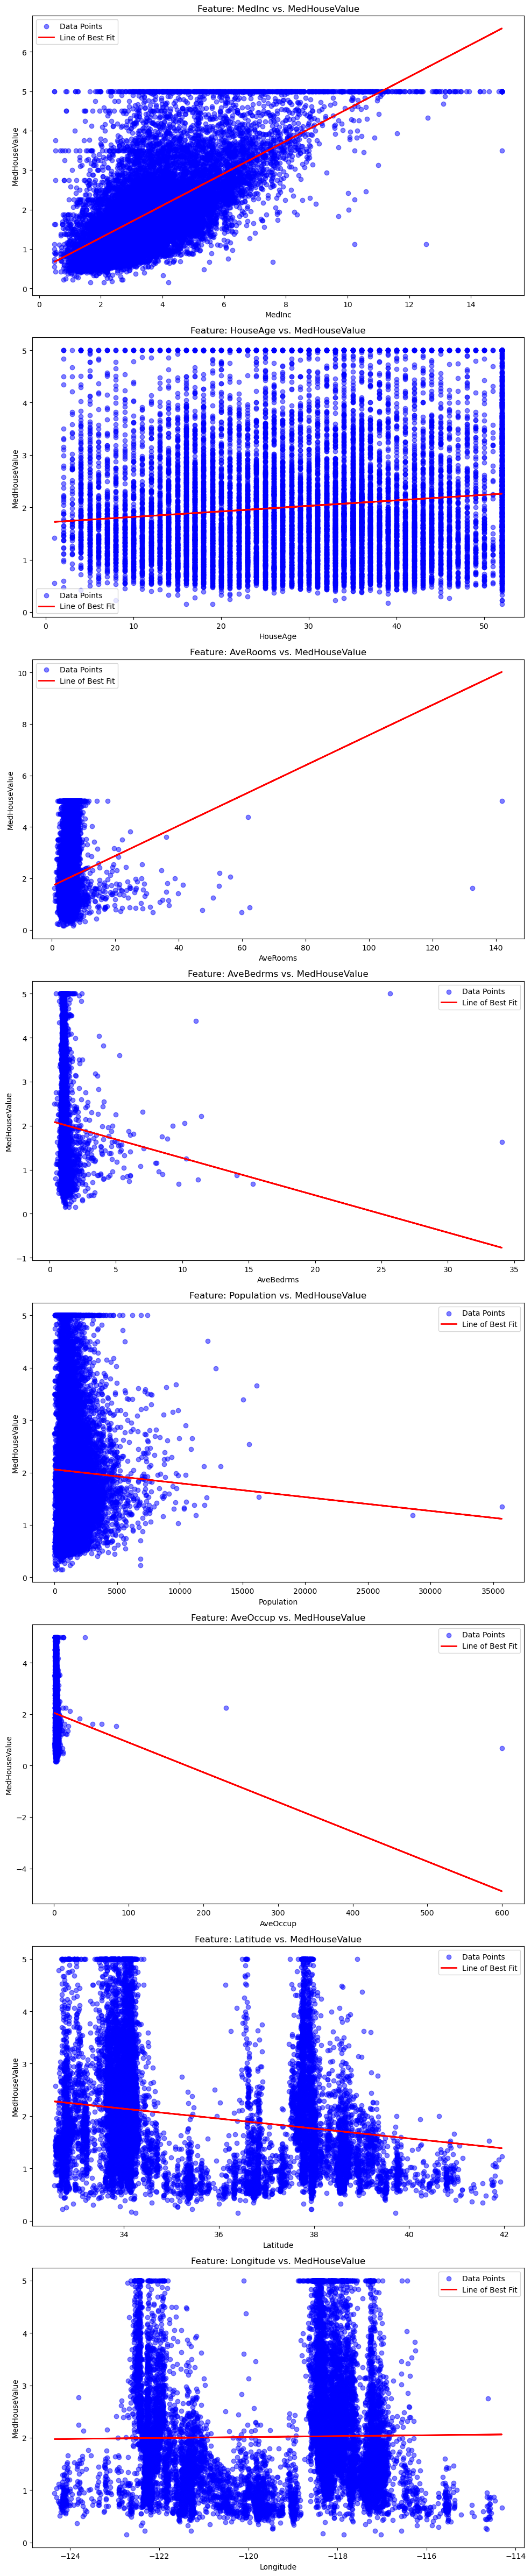

In [148]:
# Plot features against MedHouseValue
plot_features_with_best_fit(model, X_train.values, y_train.values, X_train.columns)

In [159]:
scaled_samples = scaler.transform(imputed_data)
scaled_samples

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,-0.160534,-0.725417,0.012982,-0.009714,0.053751,-0.00154,-0.601108,0.588303


In [160]:
predicted_ols = model_mse.predict(scaled_samples)
predicted_ols_dollars = np.round(predicted_mse[0] * 100000, 2)

# Print the predictions
print(f"Predicted house value using OLS model: ${predicted_ols_dollars:,.2f}")

Predicted house value using OLS model: $182,769.17
